In [107]:
#Dependencies
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import requests
from config import *
from bs4 import BeautifulSoup
from matplotlib.dates import MonthLocator, DateFormatter, YearLocator, AutoDateLocator, YEARLY
from matplotlib.ticker import LinearLocator
print(api_key)

xyc


In [108]:
#import csv
og_df = pd.read_csv("Resources/results.csv")
og_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [109]:
#names of all columns
print(og_df.columns)

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')


In [110]:
#new dataframe without other columns from csv

fatal_df = og_df.drop(columns = ['grid', 'fastestLapSpeed', 'fastestLapTime', 'fastestLap', 'milliseconds', 'time', 'laps', 'points', 'positionOrder', 'positionText'])
fatal_df.head()

,resultId,raceId,driverId,constructorId,number,position,rank,statusId
0,1,18,1,1,22,1,2,1
1,2,18,2,2,3,2,3,1
2,3,18,3,3,7,3,5,1
3,4,18,4,4,5,4,7,1
4,5,18,5,1,23,5,1,1


In [111]:
fatal_df.describe()

,resultId,raceId,driverId,constructorId,statusId
count,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000
mean,12921.334327,531.425813,261.732082,48.628328,17.568576
std,7460.682031,299.440908,268.623016,59.732131,26.155520
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6460.750000,293.000000,56.000000,6.000000,1.000000
50%,12920.500000,514.000000,163.000000,25.000000,11.000000
75%,19380.250000,784.000000,360.000000,58.000000,14.000000
max,25845.000000,1096.000000,856.000000,214.000000,141.000000


In [112]:
#np.arange(8) == np.arange(8).astype(str)
fatal_df.dtypes

resultId          int64
raceId            int64
driverId          int64
constructorId     int64
number           object
position         object
rank             object
statusId          int64
dtype: object

In [113]:
fatal_2_df = 0
for i in fatal_df["statusId"]:
    if i == 104:
        fatal_2_df = fatal_2_df+1

print(fatal_2_df)

3


Date of accident
1955    2
1958    4
1960    2
1961    1
1966    1
1967    1
1968    1
1970    2
1971    1
1973    1
1974    1
1977    1
1978    1
1982    1
1994    1
2002    1
2014    2
2017    1
Name: Driver, dtype: int64


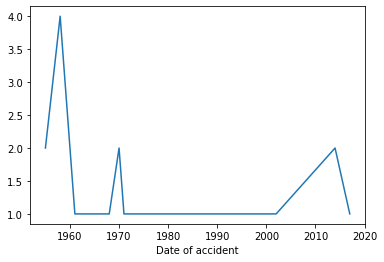

In [121]:
#API for wikipedia data
url = "https://en.wikipedia.org/wiki/List_of_Formula_One_fatalities"

page = requests.get(url)
soup  = BeautifulSoup(page.content, 'html.parser')
table = soup.find('table', class_='wikitable plainrowheaders sortable')

fatalitiesdf = pd.read_html(str(table))
fatalitiesdf = pd.concat(fatalitiesdf)
df_new = fatalitiesdf.drop(fatalitiesdf[(fatalitiesdf['Session'] == 'Test') | (fatalitiesdf['Session'] == 'Practice') | (fatalitiesdf['Session'] == 'Qualifying') | (fatalitiesdf['Session'] == 'Run')].index)
df_new.index = pd.to_datetime(df_new['Date of accident'], format='%B %d, %Y')

grouped_set = df_new.groupby(by=[df_new.index.year])['Driver'].count()
print(grouped_set)
ax = grouped_set.plot()

plt.show()